<a href="https://colab.research.google.com/github/SPThole/pyTrch/blob/master/Autograd_pytrch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto-grad and linear regression

In [47]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [48]:
#requires float elements to calculate grad
x= torch.tensor([2.,2.],requires_grad=True)
y= torch.tensor([10.,10],requires_grad=True)

In [49]:
#defining function on tensor args
def w(x,y):
  return torch.sum(x**2+y**2,axis=0)

In [50]:
z=w(x,y) 

In [51]:
#differntiating automatically: Function should give scalar as an output. as z.backwaard() assumes z.backward(torch.tensor([1.0]))
z.backward()

In [52]:
# dz/dx= 2*x
x.grad

tensor([4., 4.])

In [53]:
# dz/dy= 2*y
y.grad

tensor([20., 20.])

In [59]:
print(x.requires_grad)
print(y.requires_grad)
with torch.no_grad():
  print((y**2+x**2).requires_grad)

True
True
False


In [65]:
x.requires_grad
print(x.detach().requires_grad)

False


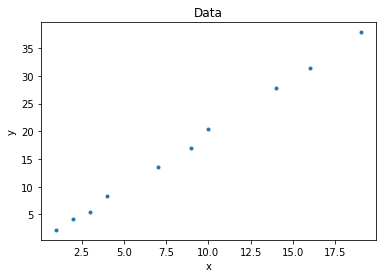

In [167]:
x= np.array([1,2,3,4,7,9,10,14,16,19])
y= 2*x+ np.random.normal(size=len(x))
plt.plot(x,y,'.')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [168]:
from torch.optim import SGD

In [169]:
w= torch.rand([2],requires_grad=True)

In [170]:
x= torch.from_numpy(x.reshape(-1,1))
y= torch.from_numpy(y.reshape(-1,1))

In [171]:
loss=torch.mean((y-w[0]*x-w[1])**2,axis=0)
loss

tensor([171.7328], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [172]:

optimizer= SGD([w],lr=0.0001)

In [175]:
max_iteration=100
history=[]
for i in range(max_iteration):
  loss=torch.mean((y-w[0]*x-w[1])**2,axis=0)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  history.append(loss)
  print('Loss at iteration {} is {}'.format(i,loss))


Loss at iteration 0 is tensor([157.3892], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 1 is tensor([150.6736], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 2 is tensor([144.2450], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 3 is tensor([138.0910], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 4 is tensor([132.2000], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 5 is tensor([126.5606], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 6 is tensor([121.1622], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 7 is tensor([115.9944], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 8 is tensor([111.0474], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 9 is tensor([106.3117], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 10 is tensor([101.7784], dtype=torch.float64, grad_fn=<MeanBackward1>)
Loss at iteration 11 is tensor(

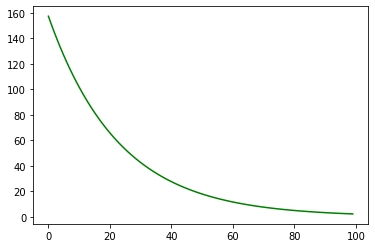

In [178]:
plt.plot(np.arange(0,100),history,'g-')